Main Python code to perform the simulation and display results

In [1]:
import numpy as np
from matplotlib import pyplot as plt, colors as mcolors
from scipy.integrate import solve_ivp
from scipy.constants import G, au
from sklearn.preprocessing import MinMaxScaler

from ctypes import c_void_p, c_double, c_int, cdll
from numpy.ctypeslib import ndpointer

In [2]:
massfactor = 10**24 # [kg]
scalefactor = 100  # [au]
velocityfactor = 100  # []
accuracy = 0.3

Generate random body system:

In [3]:
count = 10

In [4]:
def massGen():
    for _ in range(count):
        yield abs(np.random.randn())*massfactor

def positionGen():
    for _ in range(count):
        yield np.random.randn(2)*scalefactor*au

def velocityGen():
    for _ in range(count):
        yield np.random.randn(2)*velocityfactor

In [5]:
bodies = zip(masses := np.array([[_ for _ in massGen()]]), positions := np.array([_ for _ in positionGen()]))

In [6]:
velocities = np.array([_ for _ in velocityGen()])

Show data:

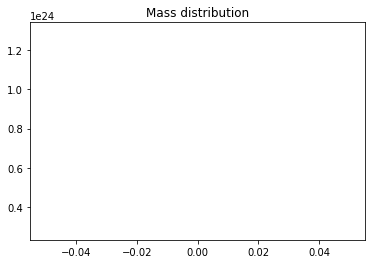

In [7]:
plt.title('Mass distribution')
plt.plot(masses)

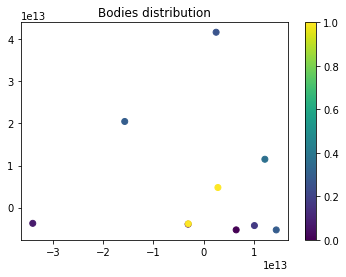

In [8]:
mass_scaler = MinMaxScaler()
cmap = mass_scaler.fit_transform(masses.reshape(-2, 2))
c = mcolors.ColorConverter().to_rgb

plt.title('Bodies distribution')
plt.scatter(positions[:, 0], positions[:, 1], c=cmap)
plt.colorbar()

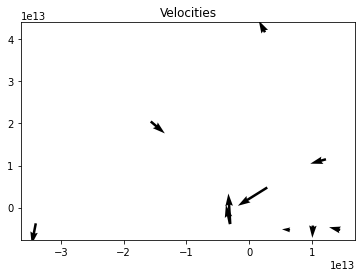

In [9]:
plt.title('Velocities')
plt.quiver(positions[:,0], positions[:,1], velocities[:,0], velocities[:,1])

Construct Python function from C shared library:

In [10]:
lib = cdll.LoadLibrary("barnes-hut/barneshut.so")
computeForces = lib.perform
computeForces.restype = ndpointer(dtype=c_double,
                          shape=(count,2))

Compute forces using C function:

In [11]:
state = np.concatenate((masses.T, positions), axis=1)

In [12]:
state

array([[ 6.29680646e+23,  6.50383799e+12, -5.27744059e+12],
       [ 2.82606351e+23, -3.06281113e+12, -3.92180648e+12],
       [ 6.72461402e+23, -3.40062681e+13, -3.72600857e+12],
       [ 1.29166593e+24,  2.86917653e+12,  4.78823089e+12],
       [ 8.43894374e+23,  1.22203511e+13,  1.15003215e+13],
       [ 4.57263453e+23,  1.01386574e+13, -4.25463368e+12],
       [ 8.02340858e+23, -1.56898337e+13,  2.04771526e+13],
       [ 5.75119422e+23,  1.44841127e+13, -5.28935882e+12],
       [ 1.21729091e+24, -3.02947916e+12, -3.82990123e+12],
       [ 5.43969335e+23,  2.50975385e+12,  4.16776279e+13]])

In [ ]:
forces = computeForces(c_void_p(state.ctypes.data),c_int(count),c_double(accuracy))